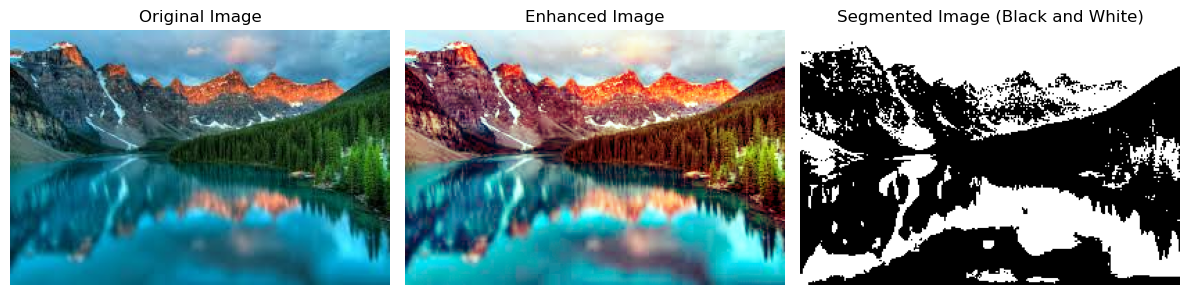

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a low-contrast color image
image = cv2.imread('download.png')

# Check if the image was loaded
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Enhance the image using histogram equalization on each channel
channels = cv2.split(image_rgb)
enhanced_channels = [cv2.equalizeHist(channel) for channel in channels]
enhanced_image = cv2.merge(enhanced_channels)

# Convert the enhanced image to grayscale for segmentation
enhanced_gray = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)

# Segment the image using a simple threshold to create a black and white image
_, segmented_image = cv2.threshold(enhanced_gray, 127, 255, cv2.THRESH_BINARY)

# Display the original, enhanced, and segmented images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Enhanced Image')
plt.imshow(enhanced_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image (Black and White)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

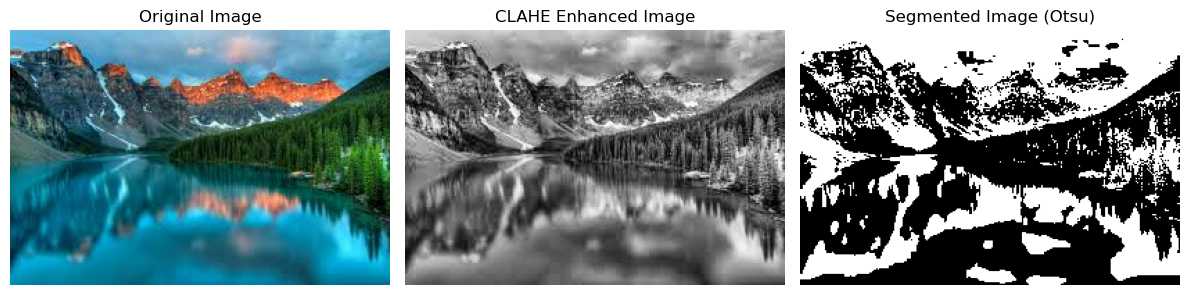

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a low-contrast color image
image = cv2.imread('download.png')

# Check if the image was loaded
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale for CLAHE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to enhance the contrast of the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)

# Use Otsu's method to segment the enhanced image
otsu_threshold, segmented_image = cv2.threshold(clahe_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original, CLAHE enhanced, and segmented images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('CLAHE Enhanced Image')
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image (Otsu)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

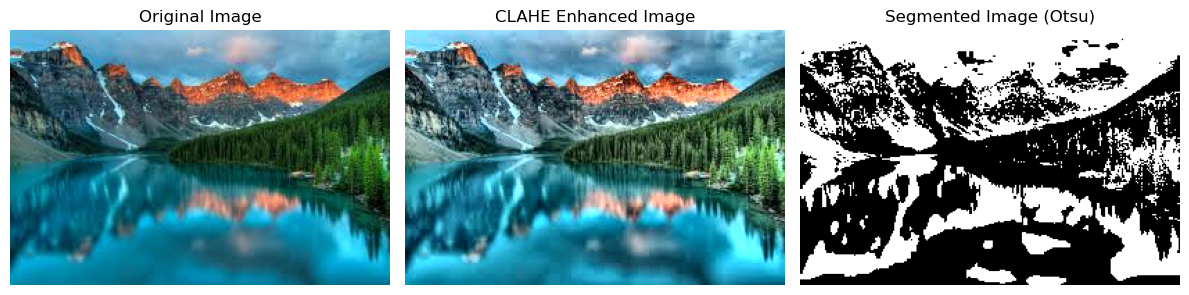

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a low-contrast color image
image = cv2.imread('download.png')

# Check if the image was loaded
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert the image from BGR to YUV color space
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Split the YUV image into its channels
y_channel, u_channel, v_channel = cv2.split(image_yuv)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the Y channel
clahe_y_channel = clahe.apply(y_channel)

# Merge the CLAHE enhanced Y channel back with the U and V channels
enhanced_yuv = cv2.merge((clahe_y_channel, u_channel, v_channel))

# Convert the enhanced YUV image back to BGR color space
enhanced_image = cv2.cvtColor(enhanced_yuv, cv2.COLOR_YUV2BGR)

# Convert the enhanced image to grayscale for Otsu's method
enhanced_gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

# Use Otsu's method to segment the enhanced grayscale image
otsu_threshold, segmented_image = cv2.threshold(enhanced_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original, CLAHE enhanced, and segmented images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('CLAHE Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image (Otsu)')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()